1. Pizza_NotPizza Dataset Images at:
https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tempfile
import numpy as np
import os
from pathlib import Path
import tensorflowjs as tfjs

2. Loading Train, Validation and Test Images Dataset

In [3]:
BATCH_SIZE = 8
PIC_SIZE = 256

train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=20,
                                                            width_shift_range = 0.1,
                                                            height_shift_range = 0.1, shear_range= 15,
                                                            zoom_range= [0.5, 1.5])

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train = train_data.flow_from_directory("./data/train", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="binary", color_mode='rgb')
validation = validation_data.flow_from_directory("./data/validation", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="binary", color_mode='rgb')

print(train.class_indices)

print(validation.class_indices)

Found 800 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
{'not_pizza': 0, 'pizza': 1}
{'not_pizza': 0, 'pizza': 1}


3. Model Structure

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(PIC_SIZE, PIC_SIZE, 3), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


4. Compiling the Model

In [5]:
tensor_board = tf.keras.callbacks.TensorBoard(log_dir="logs/model")

model.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["acc"]
)

5. Training the Model

In [6]:
history = model.fit(train, 
    epochs=35, 
    validation_data=validation,
    callbacks=[tensor_board])

print("Model Trained")

Epoch 1/35
100/100 [==============================] - 50s 439ms/step - loss: 12.0872 - acc: 0.5175 - val_loss: 7.2811 - val_acc: 0.5000
Epoch 2/35
100/100 [==============================] - 39s 388ms/step - loss: 5.4096 - acc: 0.5375 - val_loss: 4.0436 - val_acc: 0.5400
Epoch 3/35
100/100 [==============================] - 36s 363ms/step - loss: 3.3153 - acc: 0.5487 - val_loss: 2.6706 - val_acc: 0.5533
Epoch 4/35
100/100 [==============================] - 36s 355ms/step - loss: 2.3064 - acc: 0.5725 - val_loss: 1.9816 - val_acc: 0.6200
Epoch 5/35
100/100 [==============================] - 35s 353ms/step - loss: 1.7338 - acc: 0.6050 - val_loss: 1.5208 - val_acc: 0.6067
Epoch 6/35
100/100 [==============================] - 33s 325ms/step - loss: 1.3888 - acc: 0.6263 - val_loss: 1.2801 - val_acc: 0.6000
Epoch 7/35
100/100 [==============================] - 31s 307ms/step - loss: 1.1815 - acc: 0.5763 - val_loss: 1.1007 - val_acc: 0.5567
Epoch 8/35
100/100 [==============================] - 

6. Model Accuracy

In [7]:
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test = train_data.flow_from_directory("./data/test", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="binary", color_mode='rgb')

model.evaluate(test)

Found 201 images belonging to 2 classes.
26/26 [==============================] - 3s 127ms/step - loss: 0.6190 - acc: 0.7214


[0.6190251708030701, 0.7213930487632751]

7. Checking Loss and Accuracy with Tensorboard

In [8]:
%load_ext tensorboard

8. Accuracy and Loss Graphic

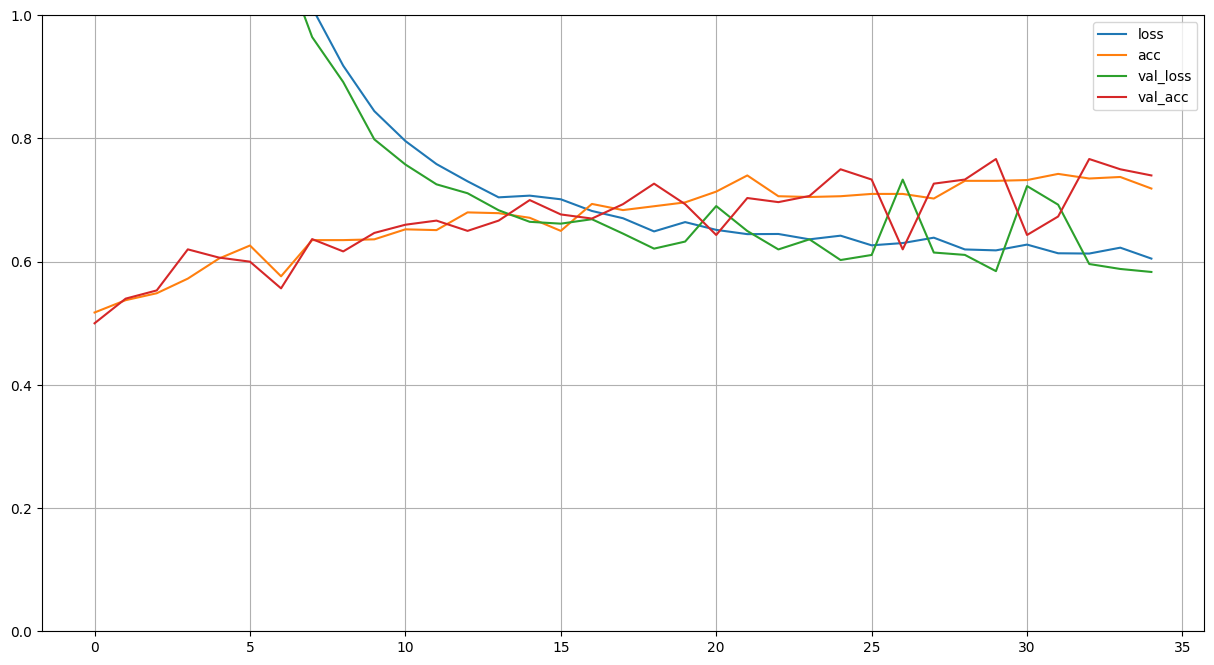

In [9]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


9. Testing the Model

1/1 [==============================] - 0s 114ms/step
[[1.]]
It's Pizza!


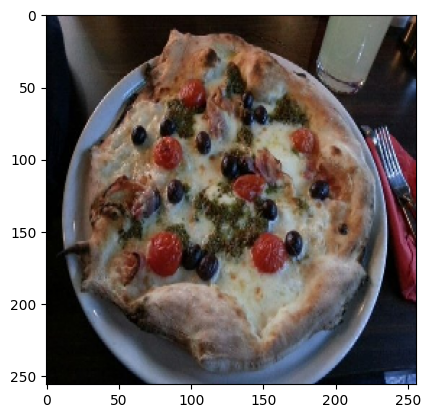

In [10]:
test_img = tf.keras.preprocessing.image.load_img("./img_test.JPG", target_size=(PIC_SIZE, PIC_SIZE), color_mode='rgb')

plt.imshow(test_img)

X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

print(result)

if result == 1 :
    print("It's Pizza!")
else :
    print("It's not Pizza!")

10. Saving the Model using Tensorflow JS

In [13]:
tfjs.converters.save_keras_model(model, "./model_js")